In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
test = scipy.io.loadmat('dados_teste.mat')
train = scipy.io.loadmat('dados_treinamento.mat')
val = scipy.io.loadmat('dados_val.mat')

In [199]:
train_val = train['X']
train_labels = train['y']

val_val = val['Xval']
val_labels = val['yval']

X_test = test['Xt']
y_test = test['yt']

In [200]:
i=0
for l in y_test:
    if l<0:
        y_test[i]=0
    i=i+1
i=0
for l in val_labels:
    if l<0:
        val_labels[i]=0
    i=i+1
i=0
for l in train_labels:
    if l<0:
        train_labels[i]=0
    i=i+1


In [201]:
len((val_val))

1000

In [202]:
X_train = np.concatenate((train_val,val_val))
y_train = np.concatenate((train_labels,val_labels))

In [207]:
clf = svm.SVC(kernel='rbf',C=7.5,gamma=5)
accs = cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy')
print (accs)           
clf.fit(X_train, y_train)

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[0.86783042 0.8725     0.905      0.91       0.84210526]


C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=7.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

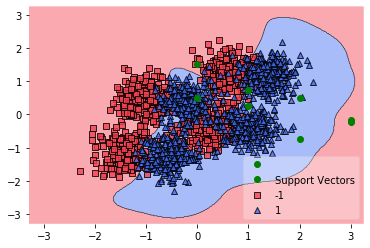

In [208]:
c =['red','blue']
count = 0;
dim = len(clf.support_)
shp = (dim, 2) 
sVectors = np.zeros(shp)
for i in clf.support_:
        sVectors[count][0] = X_train[i][0]
        sVectors[count][1] = X_train[i][1]
        count=count+1;
ax=plot_decision_regions(X_train,y_train[:,0], clf=clf,legend=2,colors='#f54251,#426cf5')

ax.plot(sVectors,'go',label="Sup Vectors")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['', 'Support Vectors', '-1','1'], 
           framealpha=0.3, scatterpoints=1)

plt.show()


In [209]:
clf.support_vectors_ #support vectors

array([[ 0.49801281,  1.50479792],
       [ 0.73502025,  0.25675196],
       [-0.73599709,  0.50121467],
       ...,
       [-0.01605385,  0.06011269],
       [-0.02650205, -0.19545172],
       [ 0.35476228, -0.34624826]])

In [210]:
clf.support_ #indices of support vectors

array([  10,   13,   16,   29,   31,   33,   39,   44,   50,   52,   53,
         60,   70,   72,   79,   87,   96,  103,  117,  123,  124,  129,
        132,  147,  151,  155,  168,  176,  178,  189,  207,  212,  215,
        217,  219,  220,  231,  238,  245,  246,  251,  254,  262,  265,
        267,  273,  275,  279,  289,  305,  314,  317,  331,  338,  346,
        359,  361,  363,  367,  372,  384,  390,  392,  393,  403,  404,
        413,  419,  420,  429,  431,  435,  444,  450,  454,  460,  485,
        487,  495,  496,  510,  514,  520,  523,  536,  549,  557,  564,
        566,  569,  581,  583,  587,  614,  624,  629,  634,  640,  649,
        654,  658,  664,  681,  685,  692,  693,  699,  703,  708,  712,
        717,  723,  725,  726,  734,  753,  756,  769,  774,  781,  782,
        789,  792,  801,  802,  812,  823,  826,  836,  838,  843,  845,
        856,  860,  862,  866,  868,  894,  895,  901,  909,  917,  929,
        930,  946,  948,  953,  956,  964,  987,  9

In [211]:
 clf.n_support_ #support vectors for each class

array([304, 311])

In [212]:
y_pred = clf.predict(X_test)

pred_score = f1_score(y_test,y_pred)
print(pred_score)
pred_acc = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" %(pred_acc*100))

0.8807157057654076
Accuracy: 88.00%


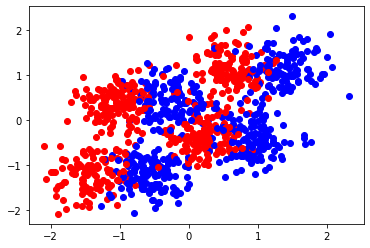

In [213]:
ind=0
for v in X_test:
    if y_test[ind]==1 :
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1


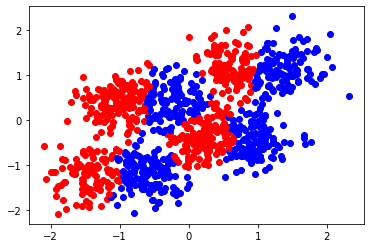

In [214]:
ind=0
for v in X_test:
    if y_pred[ind]==1:
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1

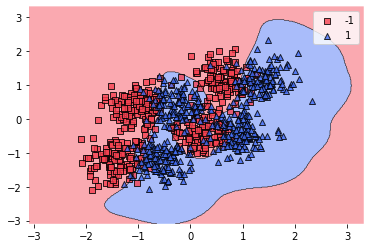

In [215]:
c =['red','blue']
ax=plot_decision_regions(X_test, y_test[:,0], clf=clf,legend=0,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['-1', '1'])
plt.show()

In [157]:
c2x = np.zeros(100)
c2y = np.zeros(100)
ct=0
count=0
for i in range(100):
    ct = ct+0.1
    clf = svm.SVC(kernel='rbf',C=ct,gamma="auto")
    accs = cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy')
    c2x[count] = ct
    c2y[count] = sum(accs)/5
    count = count+1
    clf.fit(X_train, y_train)

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Text(0, 0.5, 'Accuracy')

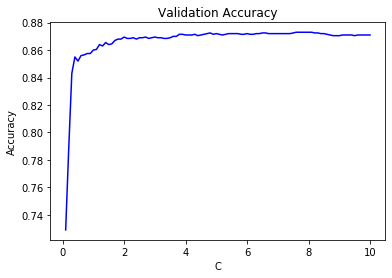

In [158]:
plt.plot(c2x, c2y, 'b', label='Acc')
plt.title('Validation Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

In [155]:
c2y

array([0.87698838, 0.87448461, 0.87598836, 0.87548711, 0.87598586,
       0.87648711, 0.87798712, 0.87848587, 0.87898337, 0.87798587,
       0.87698587, 0.87698712, 0.87748712, 0.87698712, 0.87698837,
       0.87698837, 0.87698587, 0.87698587, 0.87648462, 0.87648462,
       0.87648462, 0.87698588, 0.87698713, 0.87648713, 0.87598838,
       0.87648713, 0.87648713, 0.87748713, 0.87748713, 0.87798713,
       0.87748838, 0.87698838, 0.87698838, 0.87698962, 0.87698962,
       0.87799088, 0.87799088, 0.87799088, 0.87849088, 0.87849088,
       0.87849088, 0.87849088, 0.87898963, 0.87898963, 0.87898963,
       0.87898963, 0.87898963, 0.87898963, 0.87898963, 0.87948963,
       0.87948963, 0.87899088, 0.87849088, 0.87849088, 0.87849088,
       0.87849088, 0.87898963, 0.87848963, 0.87848963, 0.87848963,
       0.87848963, 0.87848963, 0.87848963, 0.87898838, 0.87898838,
       0.87898838, 0.87898838, 0.87898838, 0.87898838, 0.87898838,
       0.87898838, 0.87948714, 0.87948714, 0.87948714, 0.87948

In [151]:
c2x[np.argmax(c2y)]

0.0

In [144]:
cGx = np.zeros(20)
cGy = np.zeros(20)
ct=0
count=0
for i in range(20):
    ct = ct+0.5
    clf = svm.SVC(kernel='rbf',C=7.5,gamma=ct)
    accs = cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy')
    cGx[count] = ct
    cGy[count] = sum(accs)/5
    count = count+1
    clf.fit(X_train, y_train)

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Text(0, 0.5, 'Accuracy')

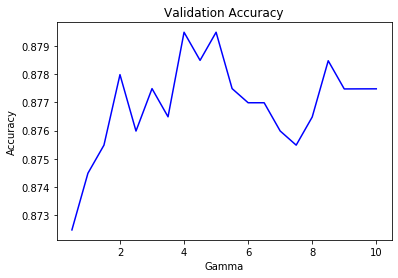

In [145]:
plt.plot(cGx, cGy, 'b', label='Acc')
plt.title('Validation Accuracy')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [146]:
cGx[np.argmax(cGy)]

5.0

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Linear Accuracy: 67.40%


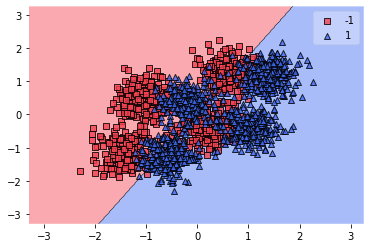

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '0' Accuracy: '50.450000937505855'%


C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


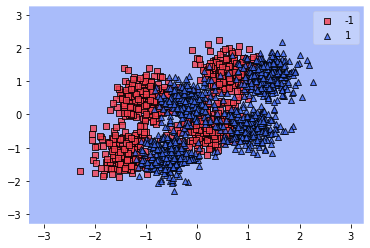

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '1' Accuracy: '67.39904468152925'%


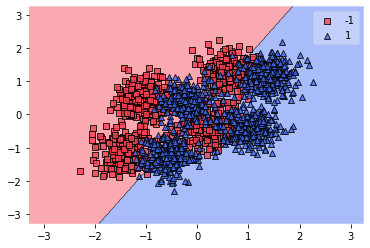

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '2' Accuracy: '50.79962749767185'%


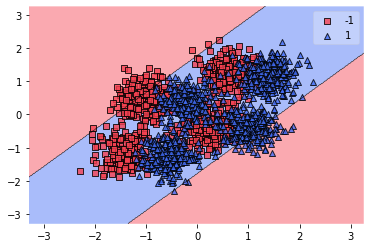

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '3' Accuracy: '72.20105469409184'%


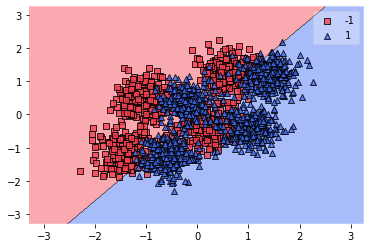

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '4' Accuracy: '51.00000281251758'%


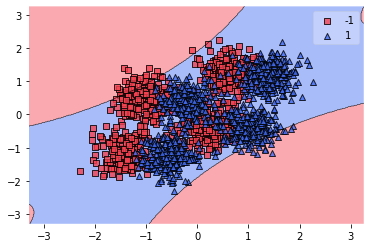

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '5' Accuracy: '76.95019187619924'%


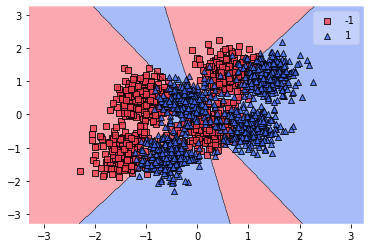

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '6' Accuracy: '50.69987624922656'%


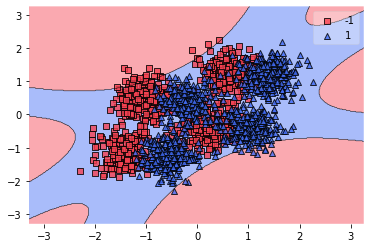

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '7' Accuracy: '76.35031093944336'%


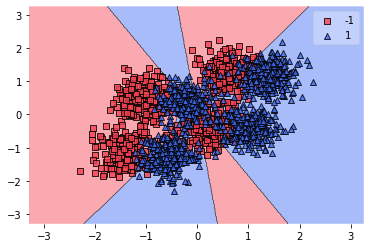

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '8' Accuracy: '50.500250314064466'%


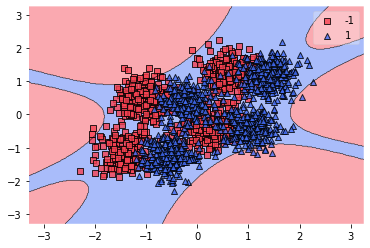

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '9' Accuracy: '76.0485621785136'%


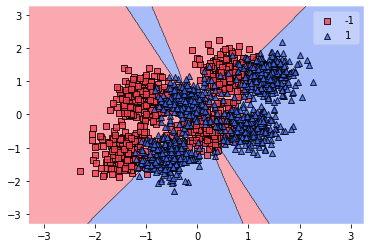

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Polynomial of degree '10' Accuracy: '50.550750317189475'%


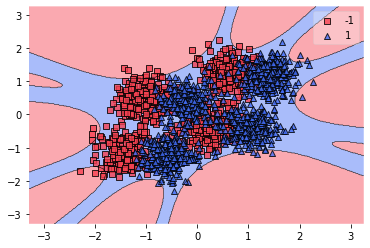

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Guassian Accuracy: 86.00%


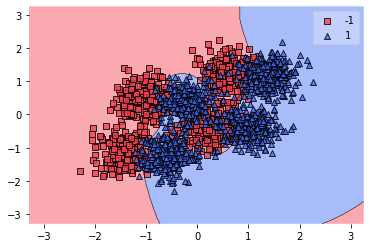

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

Sigmoid Accuracy: 38.70%


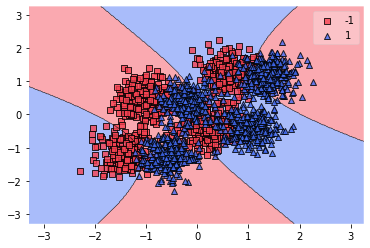

In [184]:
clf0 = svm.SVC(kernel='linear',C=7.5,gamma=5)
clf0.fit(X_train, y_train)
accs = cross_val_score(clf0, X_train,y_train, cv=5, scoring='accuracy')   
print("Linear Accuracy: %.2f%%" %( sum(accs)/5*100))
ax=plot_decision_regions(X_train,y_train[:,0], clf=clf0,legend=2,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          [ '-1','1'], 
           framealpha=0.3, scatterpoints=1)
plt.show()


for i in range(11):
    clf1 = svm.SVC(kernel='poly',C=7.5,degree=i)
    clf1.fit(X_train, y_train)
    accs = cross_val_score(clf1, X_train,y_train, cv=5, scoring='accuracy')       
    print("Polynomial of degree '{0}' Accuracy: '{1}'%".format(i,( sum(accs)/5*100)))
    ax=plot_decision_regions(X_train,y_train[:,0], clf=clf1,legend=2,colors='#f54251,#426cf5')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              [ '-1','1'], 
               framealpha=0.3, scatterpoints=1)
    plt.show()



clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train)
accs = cross_val_score(clf2, X_train,y_train, cv=5, scoring='accuracy')       
print("Guassian Accuracy: %.2f%%" %( sum(accs)/5*100))

ax=plot_decision_regions(X_train,y_train[:,0], clf=clf2,legend=2,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          [ '-1','1'], 
           framealpha=0.3, scatterpoints=1)
plt.show()


clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(X_train, y_train)
accs = cross_val_score(clf3, X_train,y_train, cv=5, scoring='accuracy')       
print("Sigmoid Accuracy: %.2f%%" %( sum(accs)/5*100))

ax=plot_decision_regions(X_train,y_train[:,0], clf=clf3,legend=2,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          [ '-1','1'], 
           framealpha=0.3, scatterpoints=1)
plt.show()

